**wine quality classification**
######This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sea
from sklearn.utils import resample

In [5]:
wineD= pd.read_csv('/content/sample_data/WineQT.csv', index_col='Id')

In [6]:
wineD.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# wineD.quality.isnull().sum()
wineD.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


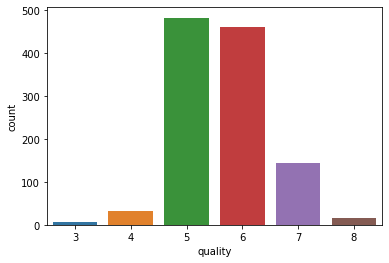

In [12]:
sea.countplot(wineD['quality']) #it clearly shows the class imbalanced data

In [16]:
#to overcome the imbalanced data we will use upsampling.
#create two different dataframe of majority and minority class 
majority= wineD[(wineD['quality']==5) | (wineD['quality']==6)]
minority= wineD[(wineD['quality']==3) | (wineD['quality']==4) | (wineD['quality']==7) | (wineD['quality']==8)]
# upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([minority_upsampled, majority])

In [21]:
wineDCopy= df_upsampled.copy()

In [23]:
wineDCopy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
927,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
1451,7.8,0.32,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,7
857,8.2,0.26,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,7
199,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
944,8.3,0.30,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7


In [24]:
wineDCopy.index.value_counts()

1478    9
901     8
929     7
444     7
1036    6
       ..
496     1
497     1
499     1
500     1
1597    1
Name: Id, Length: 1121, dtype: int64

In [40]:
'''important steps
# wineDCopy['indexId']= np.arange(wineDCopy.shape[0])#created new index, cause the previous one got duplicated while doing upsampling
# wineDCopy.head()
# wineDCopy.set_index('indexId', inplace=True)
'''
# wineDCopy.columns
# np.arange(wineDCopy.shape[0])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
wineDCopy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
indexId,,,,,,,,,,,,
0,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
1,7.8,0.32,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,7
2,8.2,0.26,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,7
3,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
4,8.3,0.30,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7


In [44]:
wineDCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1428 non-null   float64
 1   volatile acidity      1428 non-null   float64
 2   citric acid           1428 non-null   float64
 3   residual sugar        1428 non-null   float64
 4   chlorides             1428 non-null   float64
 5   free sulfur dioxide   1428 non-null   float64
 6   total sulfur dioxide  1428 non-null   float64
 7   density               1428 non-null   float64
 8   pH                    1428 non-null   float64
 9   sulphates             1428 non-null   float64
 10  alcohol               1428 non-null   float64
 11  quality               1428 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 145.0 KB


In [43]:
wineDCopy.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
wineDCopy.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.264327,0.689762,0.174192,0.111271,-0.179372,-0.125558,0.676886,-0.709810,0.200733,-0.094092,0.168280
volatile acidity,-0.264327,1.000000,-0.565238,-0.005027,0.059343,0.019475,0.087152,0.046412,0.265336,-0.340637,-0.239980,-0.525081
citric acid,0.689762,-0.565238,1.000000,0.185518,0.237355,-0.079773,-0.012066,0.352247,-0.583580,0.367367,0.143956,0.355247
residual sugar,0.174192,-0.005027,0.185518,1.000000,0.071291,0.107699,0.129926,0.359057,-0.123456,0.002445,0.080109,0.018583
chlorides,0.111271,0.059343,0.237355,0.071291,1.000000,-0.001994,0.032813,0.235454,-0.251648,0.344108,-0.250372,-0.119159
free sulfur dioxide,-0.179372,0.019475,-0.079773,0.107699,-0.001994,1.000000,0.675786,-0.060477,0.094599,0.012339,-0.061648,-0.078427
total sulfur dioxide,-0.125558,0.087152,-0.012066,0.129926,0.032813,0.675786,1.000000,0.050629,-0.029565,0.012224,-0.207645,-0.196574
density,0.676886,0.046412,0.352247,0.359057,0.235454,-0.060477,0.050629,1.000000,-0.369677,0.126583,-0.530131,-0.195685
pH,-0.709810,0.265336,-0.583580,-0.123456,-0.251648,0.094599,-0.029565,-0.369677,1.000000,-0.199000,0.213858,-0.115729
sulphates,0.200733,-0.340637,0.367367,0.002445,0.344108,0.012339,0.012224,0.126583,-0.199000,1.000000,0.129614,0.317770


In [64]:
#it is a correlated function which helps us to find the correlation between columns
#helps us to remove high correlated columns.
# def uncorrelated_features(df, threshold=0.7):
#     """
#     Returns a subset of wineDCopy columns with Pearson correlations
#     below threshold.
#     """

#     corr = df.corr()#no need .abs()
#     keep = []
#     for i in range(len(corr.iloc[:,0])):
#         above = corr.iloc[:i,i]
#         if len(keep) > 0: above = above[keep]
#         if len(above[above < threshold]) == len(above):
#             keep.append(corr.columns.values[i])

#     return df[keep]


In [73]:
# wineDCopy.head()
X= wineDCopy.drop('quality', axis=1) #featues/inputColumns
y=wineDCopy.quality #label/outputColumn

indexId
0       4
1       7
2       7
3       4
4       7
       ..
1423    6
1424    6
1425    5
1426    6
1427    5
Name: quality, Length: 1428, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
x_train, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, train_size=0.8) # does not use random seed, let it shuffle

In [76]:
y.value_counts()

5    483
6    462
7    347
4     73
8     40
3     23
Name: quality, dtype: int64

In [80]:
scores=[]
for k in range(6, 20):
  knn = KNeighborsClassifier(k).fit(x_train, ytrain)
  scores.append(knn.score(xtest,ytest))
print(scores, end = ' ')

[0.5524475524475524, 0.5314685314685315, 0.5244755244755245, 0.5384615384615384, 0.5034965034965035, 0.48951048951048953, 0.46503496503496505, 0.46153846153846156, 0.45454545454545453, 0.458041958041958, 0.45104895104895104, 0.486013986013986, 0.493006993006993, 0.479020979020979] 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6, metric='manhattan')
knn.fit(x_train, ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [83]:
# knn.score(xtest)
knn.score(x_train, ytrain), knn.score(xtest, ytest)

(0.7031523642732049, 0.5594405594405595)